# Progetto Python


In [1]:
from utils import *

In [2]:
filename = '/Users/gianpaolocoppola/Documents/GitHub/listings-3.csv'

In [3]:
df_listings = read_csv_file(filename)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20370 entries, 0 to 20369
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20370 non-null  int64  
 1   listing_url                                   20370 non-null  object 
 2   scrape_id                                     20370 non-null  int64  
 3   last_scraped                                  20370 non-null  object 
 4   source                                        20370 non-null  object 
 5   name                                          20363 non-null  object 
 6   description                                   19991 non-null  object 
 7   neighborhood_overview                         11182 non-null  object 
 8   picture_url                                   20370 non-null  object 
 9   host_id                                       20370 non-null 

In [4]:
list_elim = ['listing_url', 'scrape_id', 'last_scraped', 'source', 'picture_url', 'host_url','host_name',
             'host_location','host_thumbnail_url', 'host_picture_url', 'host_neighbourhood','host_listings_count',
             'host_total_listings_count','neighbourhood','neighbourhood_group_cleansed','bathrooms',
             'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
             'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated','has_availability', 
             'calendar_last_scraped', 'number_of_reviews_ltm','number_of_reviews_l30d','license' ]

In [5]:
df_smart = delete_col(df_listings, list_elim)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20370 entries, 0 to 20369
Data columns (total 47 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20370 non-null  int64  
 1   name                                          20363 non-null  object 
 2   description                                   19991 non-null  object 
 3   neighborhood_overview                         11182 non-null  object 
 4   host_id                                       20370 non-null  int64  
 5   host_since                                    20370 non-null  object 
 6   host_about                                    10948 non-null  object 
 7   host_response_time                            15273 non-null  object 
 8   host_response_rate                            15273 non-null  object 
 9   host_acceptance_rate                          16552 non-null 

In [6]:
type_col = {'description': str,
            'name': str,
            'neighborhood_overview': str,
            'host_about': str,
            'id': str,
            'host_id': str,
            'property_type': 'category',
            'room_type': 'category',
            'neighbourhood_cleansed': 'category',
            'host_response_time': 'category',
            'host_response_rate': float,
            'host_acceptance_rate': float,
            'price': float,
            'bathrooms_text': float,
            'amenities': list,
            'host_verifications': list,
            'host_since': 'datetime64',
            'first_review': 'datetime64',
            'last_review': 'datetime64',
            'host_is_superhost': bool,
            'host_has_profile_pic': bool,
            'host_identity_verified': bool,
            'instant_bookable': bool}



In [7]:
df_smart = change_type(df_smart, type_col)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20370 entries, 0 to 20369
Data columns (total 47 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            20370 non-null  object        
 1   name                                          20370 non-null  object        
 2   description                                   20370 non-null  object        
 3   neighborhood_overview                         20370 non-null  object        
 4   host_id                                       20370 non-null  object        
 5   host_since                                    20370 non-null  datetime64[ns]
 6   host_about                                    20370 non-null  object        
 7   host_response_time                            15273 non-null  category      
 8   host_response_rate                            15273 non-null  floa

In [8]:
cols = ['name', 'description', 'neighborhood_overview', 'host_about', 'amenities', 'host_verifications', 'first_review', 'last_review', 'host_since']

In [9]:
df_smart = add_counts_col(df_smart, cols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20370 entries, 0 to 20369
Data columns (total 56 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            20370 non-null  object        
 1   name                                          20370 non-null  object        
 2   description                                   20370 non-null  object        
 3   neighborhood_overview                         20370 non-null  object        
 4   host_id                                       20370 non-null  object        
 5   host_since                                    20370 non-null  datetime64[ns]
 6   host_about                                    20370 non-null  object        
 7   host_response_time                            15273 non-null  category      
 8   host_response_rate                            15273 non-null  floa

In [10]:
df_smart = make_point(df_smart, 'latitude', 'longitude')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20370 entries, 0 to 20369
Data columns (total 57 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            20370 non-null  object        
 1   name                                          20370 non-null  object        
 2   description                                   20370 non-null  object        
 3   neighborhood_overview                         20370 non-null  object        
 4   host_id                                       20370 non-null  object        
 5   host_since                                    20370 non-null  datetime64[ns]
 6   host_about                                    20370 non-null  object        
 7   host_response_time                            15273 non-null  category      
 8   host_response_rate                            15273 non-null  floa

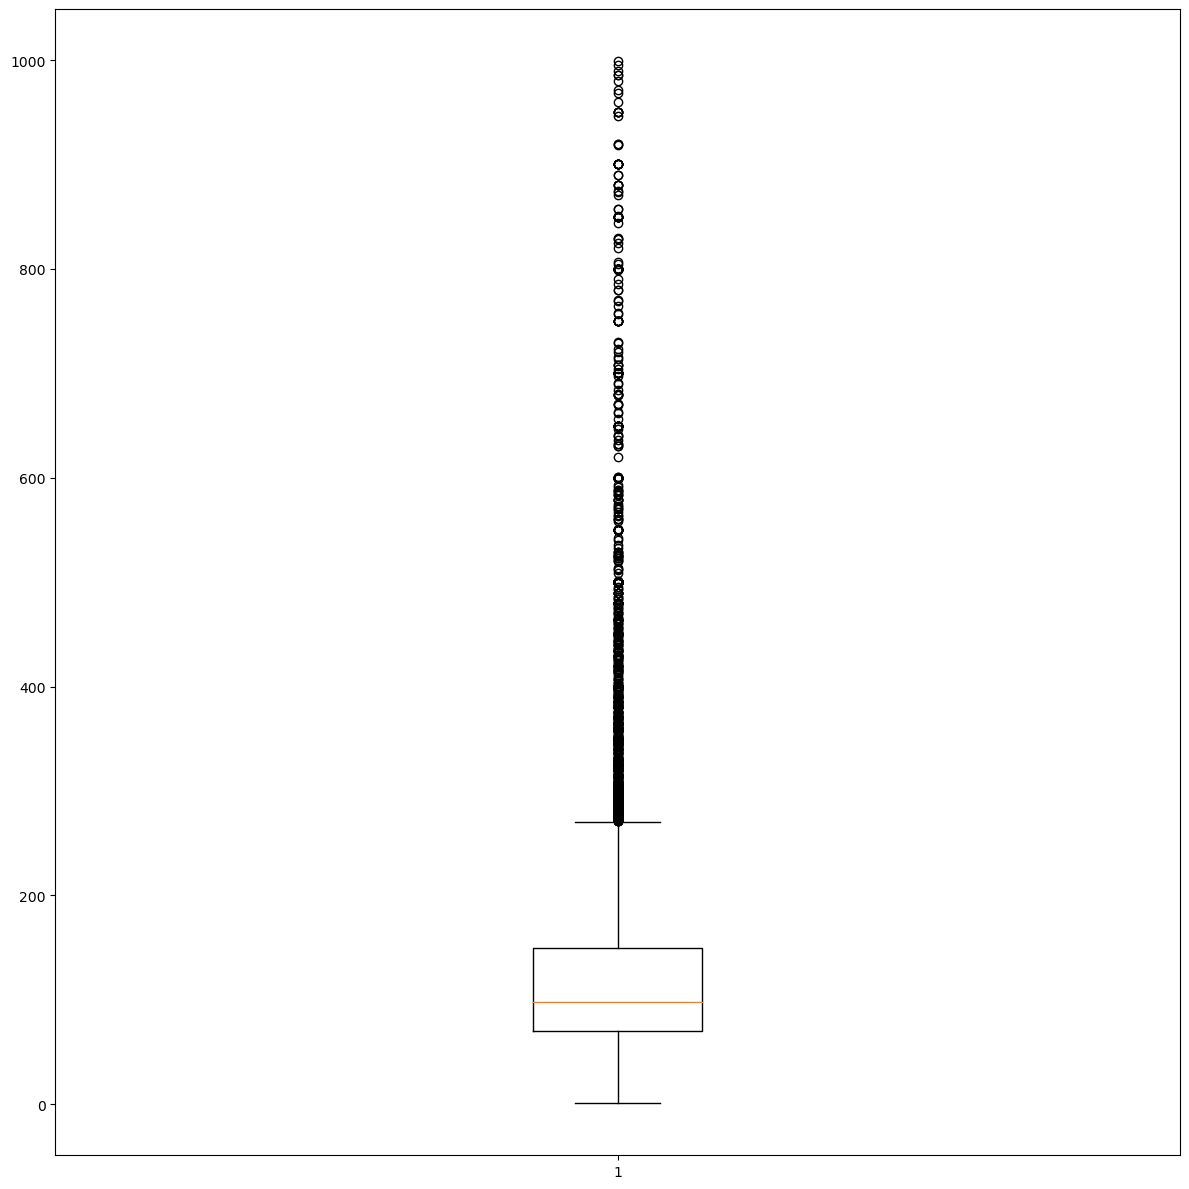

In [11]:
fig,ax = plt.subplots(figsize=(12,12), ncols=1)
ax.boxplot(df_smart['price'])
plt.tight_layout()
plt.show()

In [12]:
df_smart = remove_outliers(df_smart, 'price')

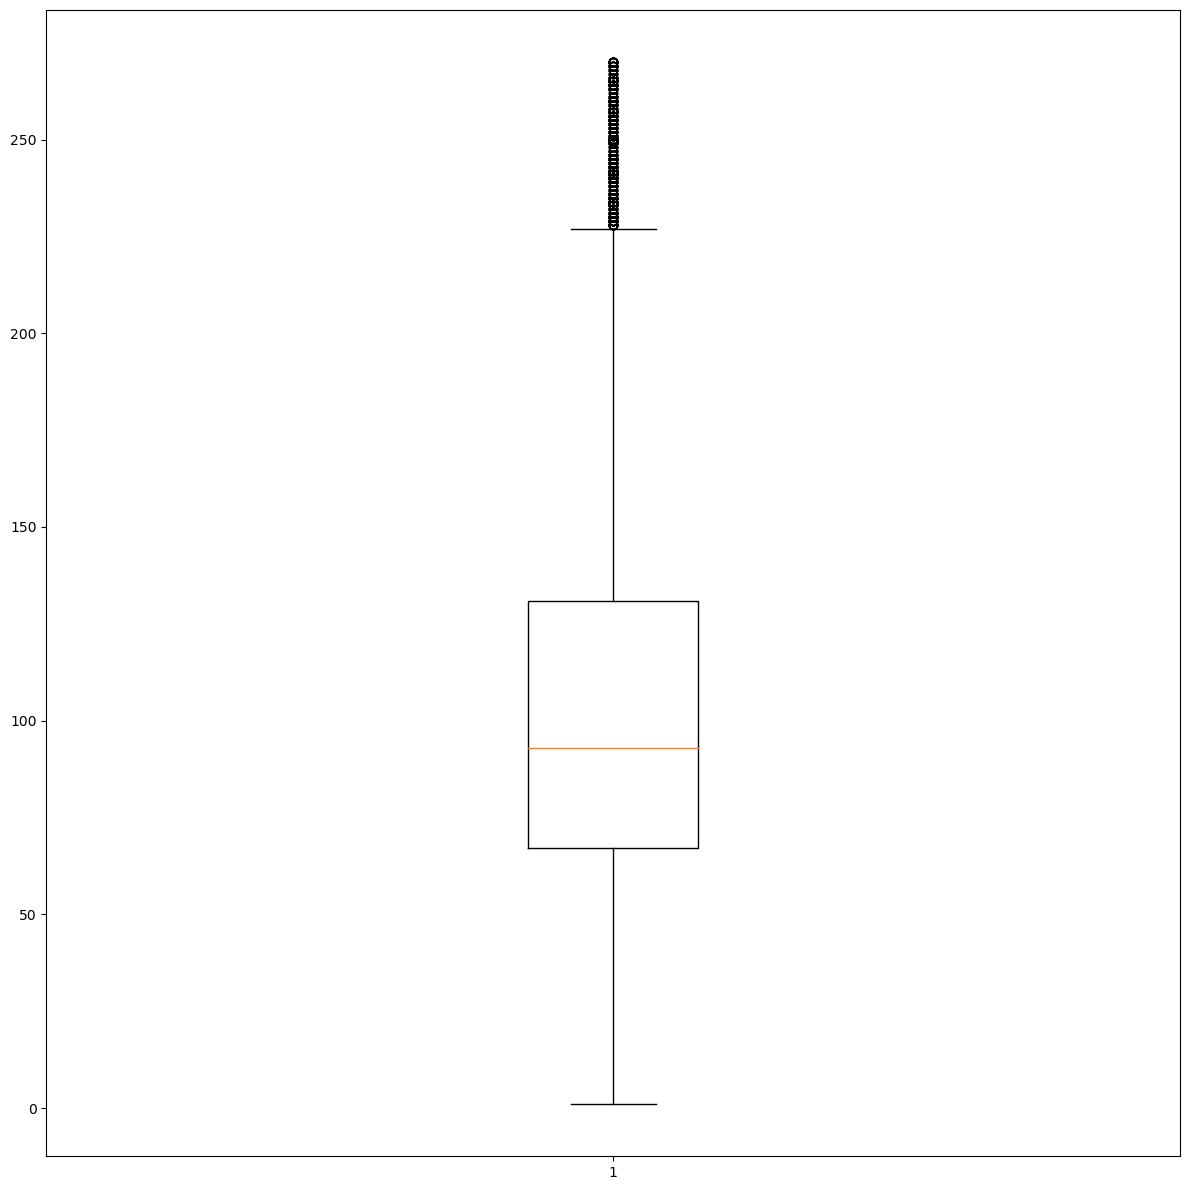

In [13]:
fig,ax = plt.subplots(figsize=(12,12), ncols=1)
ax.boxplot(df_smart['price'])
plt.tight_layout()
plt.show()

In [14]:
success_criteria = {"number_of_reviews": (">", 50), "availability_30":("<=", 5)}

In [15]:
success_df, not_success_df = split_df(df_smart, success_criteria)

In [16]:
significative = find_significant(success_df, not_success_df)
significative

,Column,P-Value,DF1 Mean,DF2 Mean,DF1 Frequency,DF2 Frequency,DF1 Best,DF2 Best
0,longitude,2.106931e-02,9.189291,9.187682,NaN,NaN,None,None
1,accommodates,1.211440e-06,3.110809,2.923982,NaN,NaN,None,None
2,price,7.458342e-48,87.273283,106.258334,NaN,NaN,None,None
3,minimum_nights,2.180126e-02,3.842284,4.979582,NaN,NaN,None,None
4,availability_30,0.000000e+00,1.558124,9.724478,NaN,NaN,None,None
5,availability_60,0.000000e+00,5.605710,21.948495,NaN,NaN,None,None
6,availability_90,0.000000e+00,11.430999,36.277310,NaN,NaN,None,None
7,availability_365,4.494449e-113,83.419443,144.635656,NaN,NaN,None,None
8,number_of_reviews,1.884569e-238,162.104691,20.437363,NaN,NaN,None,None
9,calculated_host_listings_count,8.247116e-100,8.214140,25.646614,NaN,NaN,None,None


In [17]:
dfs = {'description': {}, 'name': {}, 'amenities': {}, 'neighborhood_overview': {}}

for col in dfs.keys():
    dfs[col] = golden_word(success_df, not_success_df, col)

In [18]:
dfs['description'][:50]

,word,p_value,freq_ratio
0,central,9.410594e-41,2.079478
1,meters,1.150674e-38,2.331233
2,check,1.644201e-37,2.873837
3,station,7.673054e-27,1.687883
4,luggages,6.898013e-25,44.935352
5,keypad,1.070632e-23,20.461633
6,numeric,6.947466e-20,25.035410
7,people,9.364163e-20,1.754437
8,old,1.835680e-19,2.370216
9,receive,2.767054e-19,3.823281


In [19]:
dfs['name'][:50]

,word,p_value,freq_ratio
0,central,2.715346e-24,2.717043
1,station,5.328936e-17,2.979152
2,duomo,4.790466e-15,2.091848
3,primopiano,1.336958e-13,5.098649
4,heart,5.655712e-13,2.483260
5,studio,2.235337e-08,1.736791
6,cheap,3.540940e-08,10.037965
7,livings,1.222348e-07,22.943920
8,naviglis,1.507207e-07,14.339950
9,floors,8.095925e-07,34.415879


In [20]:
dfs['amenities'][:50]

,word,p_value,freq_ratio
0,Paid parking off premises,4.529315e-58,2.511799
1,Carbon monoxide alarm,2.963652e-51,2.016885
2,Smoke alarm,4.479167e-45,1.913834
3,Pack ’n play/Travel crib,1.924022e-26,2.336736
4,Children’s books and toys,6.331433e-25,2.622931
5,Crib,8.218070e-21,1.906188
6,High chair,2.969290e-15,1.998633
7,Lockbox,2.090206e-13,1.653720
8,Building staff,9.130716e-10,2.099522
9,Children’s dinnerware,4.325795e-09,1.944045


In [21]:
dfs['neighborhood_overview'][:50]

,word,p_value,freq_ratio
0,cathedral,1.801809e-27,3.714813
1,square,2.636350e-27,3.117034
2,decorated,6.431420e-25,62.201523
3,arranged,3.650990e-23,107.815973
4,considering,3.918155e-23,58.054755
5,shape,1.633403e-21,38.703170
6,cat,2.342291e-21,99.522437
7,closes,2.370323e-21,53.907987
8,perspective,2.370323e-21,53.907987
9,equestrian,2.370323e-21,53.907987


In [22]:
filename2 = '/Users/gianpaolocoppola/Documents/GitHub/reviews-3.csv'

In [23]:
df_reviews = read_csv_file(filename2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611804 entries, 0 to 611803
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     611804 non-null  int64 
 1   id             611804 non-null  int64 
 2   date           611804 non-null  object
 3   reviewer_id    611804 non-null  int64 
 4   reviewer_name  611804 non-null  object
 5   comments       611777 non-null  object
dtypes: int64(3), object(3)
memory usage: 28.0+ MB
None


In [24]:
list_elim2 = ['id', 'date', 'reviewer_id', 'reviewer_name']

In [25]:
reviews_smart = delete_col(df_reviews, list_elim2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611804 entries, 0 to 611803
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  611804 non-null  int64 
 1   comments    611777 non-null  object
dtypes: int64(1), object(1)
memory usage: 9.3+ MB
None


In [26]:
type_col2 = {'listing_id': str,
            'comments': str}

In [27]:
reviews_smart = change_type(reviews_smart, type_col2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611804 entries, 0 to 611803
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  611804 non-null  object
 1   comments    611804 non-null  object
dtypes: object(2)
memory usage: 9.3+ MB
None


In [28]:
def add_success_column(reviews_smart, df_smart):
    # crea un set degli id di annunci di successo
    success_ids = set(df_smart.loc[df_smart['success'] == True, 'id'])
    
    # aggiungi la colonna 'success' a reviews_smart
    reviews_smart['success'] = reviews_smart['listing_id'].isin(success_ids)
    
    return reviews_smart


In [29]:
reviews_smart = add_success_column(reviews_smart, df_smart)

In [30]:
reviews_smart

,listing_id,comments,success
0,6400,i had such a great stay at 'the studio.' fran...,False
1,6400,staying at francesca's and alberto's place was...,False
2,6400,this is my second time staying with francesca ...,False
3,6400,"ein wunderbares zimmer mit privatem bad/ wc, a...",False
4,6400,"i was lucky so i have stayed with francesca, a...",False
...,...,...,...
611799,838184897759433339,nice and quiet area not far from the metro and...,False
611800,838188511130316229,this apartment is perfect!!! and angelo was an...,False
611801,838266422550245358,ottimo,False
611802,838266422550245358,it was really nice!,False


In [31]:
reviews_smart['success'].value_counts()[True]

238456

In [32]:
reviews_for_success = reviews_smart.groupby('success').get_group(True)
reviews_for_not_success = reviews_smart.groupby('success').get_group(False)


In [33]:
df=golden_word(reviews_for_success, reviews_for_not_success, 'comments')

In [37]:
df[:50]

,word,p_value,freq_ratio
0,cristiana,0.000000e+00,11.130541
1,marco,0.000000e+00,2.873616
2,nir,0.000000e+00,1572.612891
3,vasco,2.360795e-225,5.922806
4,marcos,1.589849e-221,4.251864
5,richard,2.682025e-221,205.149693
6,elisabetta,4.180953e-218,4.078307
7,bruno,3.812489e-153,5.387468
8,bruna,3.235013e-141,33.810350
9,florent,1.022877e-129,590.674006
